# Project: Investigate a Movie dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue. The features of the movies like the title, release year, budget, director, run time, cast, tagline etc. make the dataset.

I plan to explore the following research questions about the movie dataset based on the features available.
1. What is the average run time for a movie ?
2. Has the run time changed over the years?
3. How does the distribution for the feature budget vary for the movies?
4. What is the mean voter average for the movies?
5. What unique movie genres are present and which one is the highest in number?
6. Which genres are the most popular over time?
7. Does popularity dictate more profits?
8. Which horror movies are the most popular?

In [1]:
# Load all the useful libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline 

## Data Wrangling

Check for datatypes, shape of the data, missing values, erroneous data and duplicate values.


In [2]:
# Read in the csv file for this movie dataset into the jupyter notebook here
df= pd.read_csv('tmdb-movies.csv')

In [3]:
df.head()
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
#Check the dimensions of the dataset
df.shape

(10866, 21)

In [5]:
#Take a look at the variables and their datatypes, also look for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Above, we see that some columns have rows in which values are missing, for example the genres, homepage,cast etc. The genre and title columns are a string object as we would like. However, we may have to convert the genre to a category.

In [6]:
#Check for duplicate rows
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [7]:
df[df['original_title'] =='TEKKEN']
#THE row for the movie TEKKEN seems to have duplicate rows. So I will go ahead on remove it.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
df.drop_duplicates(inplace =True)
#NOW check the shape of the dataset again to make sure.
df.shape

(10865, 21)

In [9]:
#Check the data for any missing values
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

imdb_id                   10
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
genres                    23
production_companies    1030
dtype: int64

Above we see that there are missing values for the features that I will be exploring. Before I decide if I need to remove those or not. I will go ahead and drop the unnecessary columns; the ones which are irrelevant to my analysis; those being the imdb id, the id column, homepage, tagline,vote count ,cast, director, overview, budget, revenue. I am keeping the budget adjusted and revenue adjusted columns for the analysis purpose since they seem to be the updated budget and revenue values that account for the inflation after 2010. So I will be using these columns instead for the budget and revenue analyses. I removed the votecount and keeping the vote average column since the vote average will give a better metric that the vote count.

In [10]:
#drop the unwanted columns
df_edited= df.drop(['release_date', 'tagline', 'vote_count','homepage', 'keywords', 'overview', 'id', 'imdb_id','budget', 'revenue','cast'], axis = 1)

In [11]:
#Check the first few rows of the edited dataframe
df_edited.head()

,popularity,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
#Now looking back at the null or missing values. Check again for the missing values in the edited data
null_columns=df_edited.columns[df_edited.isnull().any()]
df_edited[null_columns].isnull().sum()

director                  44
genres                    23
production_companies    1030
dtype: int64

In [13]:
# So take a look at the rows for the misisng values above
print(df_edited[df_edited.isnull().any(axis=1)][null_columns].head())

           director                        genres production_companies
228  Louie Psihoyos         Adventure|Documentary                  NaN
259       Alex Zamm                      TV Movie                  NaN
295  Peter Sullivan               Family|TV Movie                  NaN
298      Nick Simon         Crime|Horror|Thriller                  NaN
328  Jennifer Phang  Science Fiction|Drama|Family                  NaN


In [14]:
df_edited[df_edited['production_companies'].isnull()].head()

,popularity,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
228,0.584363,Racing Extinction,Louie Psihoyos,90,Adventure|Documentary,NaN,7.8,2015,0.0,0.0
259,0.476341,Crown for Christmas,Alex Zamm,84,TV Movie,NaN,7.6,2015,0.0,0.0
295,0.417191,12 Gifts of Christmas,Peter Sullivan,84,Family|TV Movie,NaN,6.3,2015,0.0,0.0
298,0.370258,The Girl in the Photographs,Nick Simon,95,Crime|Horror|Thriller,NaN,4.7,2015,0.0,0.0
328,0.367617,Advantageous,Jennifer Phang,92,Science Fiction|Drama|Family,NaN,6.4,2015,0.0,0.0


Above, we see that the rows where the production companies are missing also have zero values for the budget and revenue columns. So it looks like the movies where these values are missing are not the main stream commercial cinema nd are probably independently made. According to the Wikepedia, this movie was distributed only by the Netflix. So I will go ahead and remove these data since I am trying to look at only the box office movies.

In [64]:
#Some values for production companies and genres are NAN values. At this time, I will remove the rows with NAN values
# for the genres since there is no point in keeping those rows if I want to analyze the genres for the frequency distribution.
df_edited[df_edited['genres'].isnull()][null_columns].head()

,director,genres,production_companies
424,Guido Chiesa,NaN,NaN
620,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,Ruthless Pictures|Hollywood Shorts
997,Steward Lee|Steven G. Lee,NaN,NaN
1712,Russell Mulcahy,NaN,Daniel Sladek Entertainment
1897,Bruce Hendricks,NaN,NaN


In [16]:
# So remove those rows for genres and production companies


In [65]:
movies= df_edited.dropna(axis=0, how ='any', subset=['genres', 'production_companies'])

In [71]:
movies.shape

(9826, 10)

In [72]:
# Verify if the edited data contains non null genre and production values. Nothing seen. 
#So now we have movie dataframe with all non null genre values and production companies, Only null values for director are seen
movies.isnull().any()


popularity              False
original_title          False
director                 True
runtime                 False
genres                  False
production_companies    False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

## Exploratory data analyses
NOW that we have cleaned the data for null values for the variables we are interested in, we will look at the first independent variable, the run time for the movies.

In [18]:
#To start with, look at the summary of the numeric variables in general as below
movies.shape

(9826, 10)

In [19]:
movies.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,9826.000000,9826.000000,9826.000000,9826.000000,9.826000e+03,9.826000e+03
mean,0.692013,102.674944,5.967973,2000.903216,1.931209e+07,5.674069e+07
std,1.034783,28.202856,0.914518,13.032568,3.559582e+07,1.510917e+08
min,0.000188,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.230920,90.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.417270,100.000000,6.000000,2005.000000,1.962531e+05,0.000000e+00
75%,0.773717,112.000000,6.600000,2011.000000,2.432644e+07,4.248459e+07
max,32.985763,877.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


## Research question1 - What is the average run time for a movie ?

Analyse the first variable, the run time. The mininum run time is 0.00 minutes and the maximum is 877 minutes.That is quite a difference in the run time. let us look at the distribution.

In [73]:
#WRITE A FUNCTION to do the repeated task of looking at the numeric variable statistics and its distribution
def stats(col):
    print (col)
    print('Mean:', movies[col].mean())
    print('Median :', movies[col].median())
    print("The " + col + " stats: ", movies[col].describe())
    movies[col].plot(kind='hist')

runtime
Mean: 102.67494402605332
Median : 100.0
The runtime stats:  count    9826.000000
mean      102.674944
std        28.202856
min         0.000000
25%        90.000000
50%       100.000000
75%       112.000000
max       877.000000
Name: runtime, dtype: float64


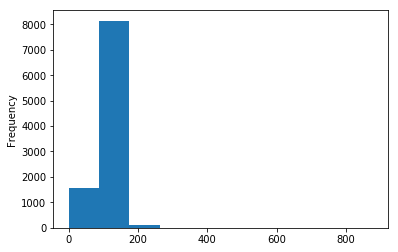

In [74]:
#Call the stats function to view the variable run time 
stats('runtime')

Since there is a lot of difference in the min and max values, so let us look at the median run time as well.

In the descriptive statistics above, we notice that the movies with zero minimum run time also have budget and revenue as zero as the minimum values. After checking the rows for the minimum value of 2 min of run time and the maximum value of 877 minutes(see the results below), we see that the budget and revenue is also zero again in these rows. So I want to make the same argument here that these are probably the non commercial kind of small movies that were made.

In [22]:
movies[movies['runtime']== 2.00]

,popularity,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
7905,0.647261,The Adventures of AndrÃ© and Wally B.,Alvy Ray Smith,2,Animation,Lucasfilm|Pixar Animation Studios,5.3,1984,0.0,0.0
10550,0.306425,Luxo Jr.,John Lasseter,2,Animation|Family,Pixar Animation Studios,7.3,1986,0.0,0.0


In [23]:
#Also look at the info for the runtime of 877 minutes. See that the budget and revenue for this one is zero here.
movies[movies['runtime']== 877.0]

,popularity,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
4041,0.469332,Taken,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,877,Science Fiction,DreamWorks,6.8,2002,0.0,0.0


Looking at the above rows of data, it won't hurt to remove the rows with zero budget and revenue values to get a proper idea of the average run time.

In [76]:
#Remove the rows with zero revenue and budget values
movies= movies[(movies['revenue_adj'] > 0) & (movies['budget_adj'] >0)]

runtime
Mean: 109.3623949579832
Median : 106.0
The runtime stats:  count    3808.000000
mean      109.362395
std        19.855757
min        15.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64


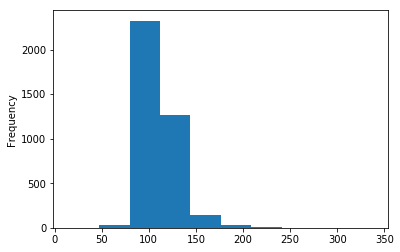

In [77]:
#Again look at the run time after modifying the data 
stats('runtime')

Now the minimum runtime is 15 minutes and maximum runtime is 338 minutes , the mean and median are very close with the mean being 109 minutes and the median 106 minutes which would make sense.

The histogram above looks good now. Most movies have a runtime between 90 and 150 minutes as seen in the histogram above.

## Research question2 : Has the run time changed over the years ?

Text(0.5,1,'Average Run time of movies per year')

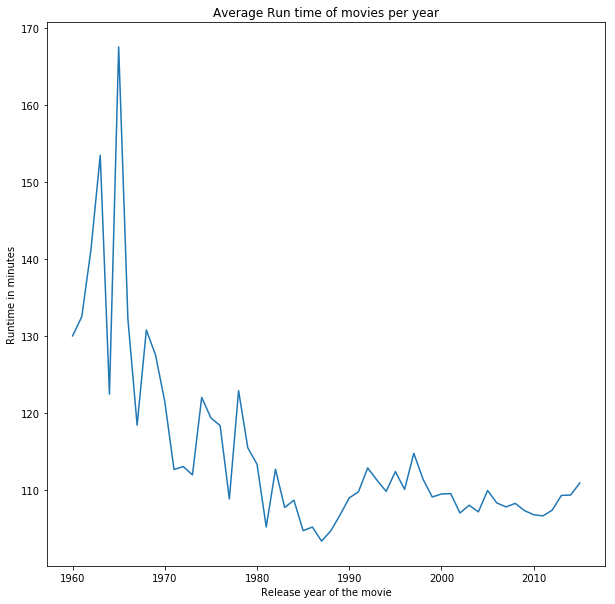

In [78]:
movies.groupby('release_year')['runtime'].mean().plot(figsize=(10,10));
plt.xlabel("Release year of the movie")
plt.ylabel("Runtime in minutes")
plt.title("Average Run time of movies per year")

The above plot shows that the run time has been decreasing over the years.

## Research question 3: How does the distribution for the feature budget vary for this dataset?
Lets look at the budget variable and popularity variable since they seem to have outliers.

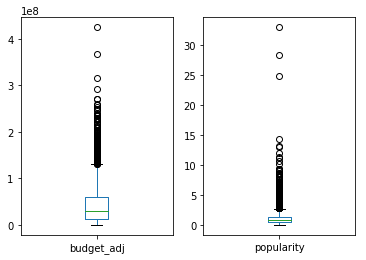

In [79]:
movies[['budget_adj','popularity']].plot(kind ='box',subplots=True);

budget_adj
Mean: 44686602.8051384
Median : 30383599.014275
The budget_adj stats:  count    3.808000e+03
mean     4.468660e+07
std      4.488486e+07
min      9.693980e-01
25%      1.352552e+07
50%      3.038360e+07
75%      6.082162e+07
max      4.250000e+08
Name: budget_adj, dtype: float64


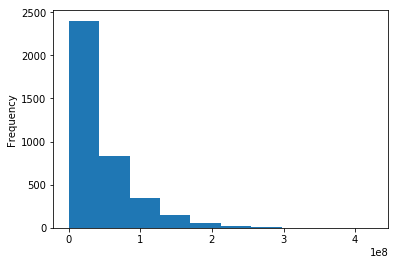

In [80]:
#The budget and popularity do have outliers a seen in the above box plots.
stats('budget_adj')
#Checking the basic stats one more time calling the stats function created above

In [ ]:
The budget variable shows a lot of difference in the min and max values. That explains its skewed nature as seen in its histogram.

popularity
Mean: 1.2029428731617644
Median : 0.8089909999999995
The popularity stats:  count    3808.000000
mean        1.202943
std         1.480290
min         0.010335
25%         0.470235
50%         0.808991
75%         1.386848
max        32.985763
Name: popularity, dtype: float64


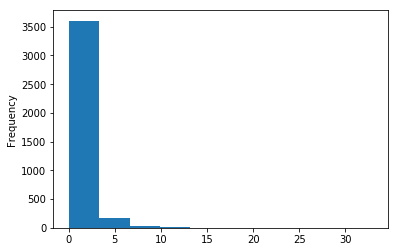

In [81]:
stats('popularity')

Checking below if the outliers for the variable popularity is a valid value shows it seems to be so since there are other values which are anywhere between 10 and 32 as well. So I have not discarded these values for popularity and kept them intact all through my analyses.

In [82]:
movies[movies['popularity']> 10.0]

,popularity,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
629,24.949134,Interstellar,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,8.0,2014,1.519800e+08,5.726906e+08
630,14.311205,Guardians of the Galaxy,James Gunn,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7.9,2014,1.565855e+08,7.122911e+08
631,12.971027,Captain America: The Winter Soldier,Joe Russo|Anthony Russo,136,Action|Adventure|Science Fiction,Marvel Studios,7.6,2014,1.565855e+08,6.583651e+08
632,11.422751,John Wick,Chad Stahelski|David Leitch,101,Action|Thriller,Thunder Road Pictures|Warner Bros.|87Eleven|De...,7.0,2014,1.842182e+07,7.252661e+07
633,10.739009,The Hunger Games: Mockingjay - Part 1,Francis Lawrence,123,Science Fiction|Adventure|Thriller,Lionsgate|Color Force,6.6,2014,1.151364e+08,6.927528e+08
634,10.174599,The Hobbit: The Battle of the Five Armies,Peter Jackson,144,Adventure|Fantasy,WingNut Films|New Line Cinema|3Foot7|Metro-Gol...,7.1,2014,2.302728e+08,8.797523e+08


The distribution for the budget is skewed to the right which agrees with the statistics seen above.

## Research question 4: What is the mean for the variable vote average for movies?

vote_average
Mean: 6.17014180672269
Median : 6.2
The vote_average stats:  count    3808.000000
mean        6.170142
std         0.792342
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64


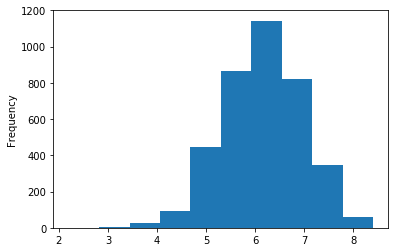

In [83]:
#View the histogram for the variable vote average
#Call the stats function to look at the voter average
stats('vote_average')


The above histogram shows a nice normal curve for the vote average varaible in our edited dataset movie_sub with the mean vote_average being 6.17 as seen in the numbers above.

## Research question 5: What unique movie genres are present and which one is the highest in number?

Now will take a look at the GENRE variable. Let us first look at the frequency of each genre. We see below that the genre for each movie has multiple values separated by a pipe character. Let us first clean that. To do this, first we separate the genre string into a list of words and then put each genre in a separate row for a movie.

In [92]:
#Use str.split()
movies['mov_genre']= movies['genres'].str.split('|')
movies.tail(4)

,popularity,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,mov_genre
10828,0.402730,Torn Curtain,Alfred Hitchcock,128,Mystery|Thriller,Universal Pictures,6.3,1966,2.015404e+07,8.733419e+07,"[Mystery, Thriller]"
10829,0.395668,El Dorado,Howard Hawks,120,Action|Western,Paramount Pictures|Laurel Productions,6.9,1966,3.125892e+07,4.030809e+07,"[Action, Western]"
10835,0.299911,The Sand Pebbles,Robert Wise,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,7.0,1966,8.061618e+07,1.343603e+08,"[Action, Adventure, Drama, War, Romance]"
10848,0.207257,Fantastic Voyage,Richard Fleischer,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,6.7,1966,3.436265e+07,8.061618e+07,"[Adventure, Science Fiction]"


In [93]:
#USE pandas .stack() method on the genre series to achieve the desired structure.
movie_edited= movies['mov_genre'].apply(lambda x: pd.Series(x)).stack().reset_index(level= 1, drop = True).to_frame('mov_genre').join(movies[['popularity', 'release_year', 'original_title','runtime','vote_average', 'budget_adj', 'revenue_adj']], how= 'left')

In [94]:
#Look at the unique genres that we have now 
movie_edited['mov_genre'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

The unique movie genres are in all 20 as seen above.

In [99]:
#Take a  look at the few rows of the edited dataset now
movie_edited.head()

,mov_genre,popularity,release_year,original_title,runtime,vote_average,budget_adj,revenue_adj
0,Action,32.985763,2015,Jurassic World,124,6.5,1.379999e+08,1.392446e+09
0,Adventure,32.985763,2015,Jurassic World,124,6.5,1.379999e+08,1.392446e+09
0,Science Fiction,32.985763,2015,Jurassic World,124,6.5,1.379999e+08,1.392446e+09
0,Thriller,32.985763,2015,Jurassic World,124,6.5,1.379999e+08,1.392446e+09
1,Action,28.419936,2015,Mad Max: Fury Road,120,7.1,1.379999e+08,3.481613e+08


In [96]:
#Convert the genre type from string to a Category
movie_edited['mov_genre']= movie_edited['mov_genre'].astype('category')# speeds the groupby and uses less memory


In [97]:
#Check if it was done
movie_edited['mov_genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
                 ordered=False)

Next we shall look at the proportions of these genres over all

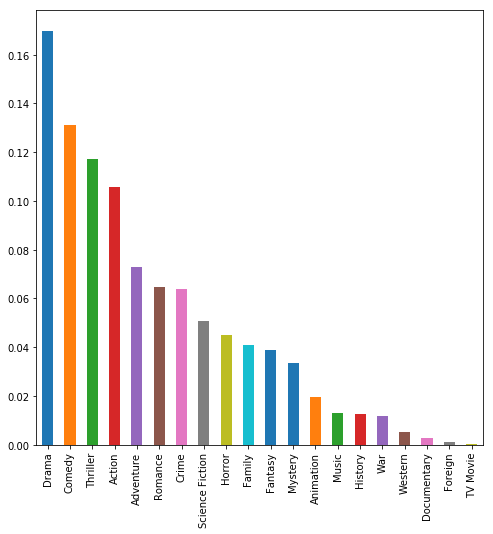

In [98]:
#Question: How many entries of each genre are found ? 
#normalizing finds proportions
movie_edited.mov_genre.value_counts(normalize=True).plot(kind = 'bar', figsize=(8,8));

More movies are in the category :Drama

Next, we will explore the question, Which genres are popular over time? For this, we will group by the release year and the genres, then check the average popularity for this combination.

## Research question 6: Which genres are the most popular over time?

In [41]:
#Group the dataframe by the release year and the genres to see the average poplarity of movies by this combination
popu_genre =movie_edited.groupby(['release_year','mov_genre']).popularity.mean()

In [42]:
popu_genre.head(10)

release_year  mov_genre
1960          Action       1.504538
              Adventure    1.872132
              Comedy       0.501564
              Drama        1.564871
              History      1.136943
              Horror       2.610362
              Romance      0.501564
              Thriller     2.610362
              Western      1.872132
1961          Action       0.464139
Name: popularity, dtype: float64

Now let us visualize the above in a plot. To get a proper plot, we need to further modify the genre series above by unstacking a level like below and save it as genre1

In [43]:
genre1=popu_genre.unstack(level='mov_genre')
genre1.head()

mov_genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,1.504538,1.872132,NaN,0.501564,NaN,NaN,1.564871,NaN,NaN,NaN,1.136943,2.610362,NaN,NaN,0.501564,NaN,NaN,2.610362,NaN,1.872132
1961,0.464139,1.693268,2.631987,1.244521,0.900245,NaN,0.753022,1.467885,NaN,NaN,0.538364,0.249542,0.900245,NaN,1.752027,NaN,NaN,NaN,0.754548,0.173731
1962,1.848380,1.621842,NaN,NaN,0.810805,NaN,0.641333,NaN,NaN,NaN,1.168767,NaN,NaN,NaN,NaN,NaN,NaN,3.170651,1.168767,0.516593
1963,1.357698,1.586280,NaN,0.920094,NaN,NaN,0.558673,NaN,NaN,NaN,0.558673,1.139321,NaN,0.920094,0.862313,NaN,NaN,1.364218,0.664326,NaN
1964,3.153791,3.153791,NaN,1.670163,0.663446,NaN,0.922681,1.310850,1.987819,NaN,NaN,NaN,1.144632,0.663446,0.408402,NaN,NaN,1.908618,2.210475,NaN


Text(0,0.5,'Popularity of the genre')

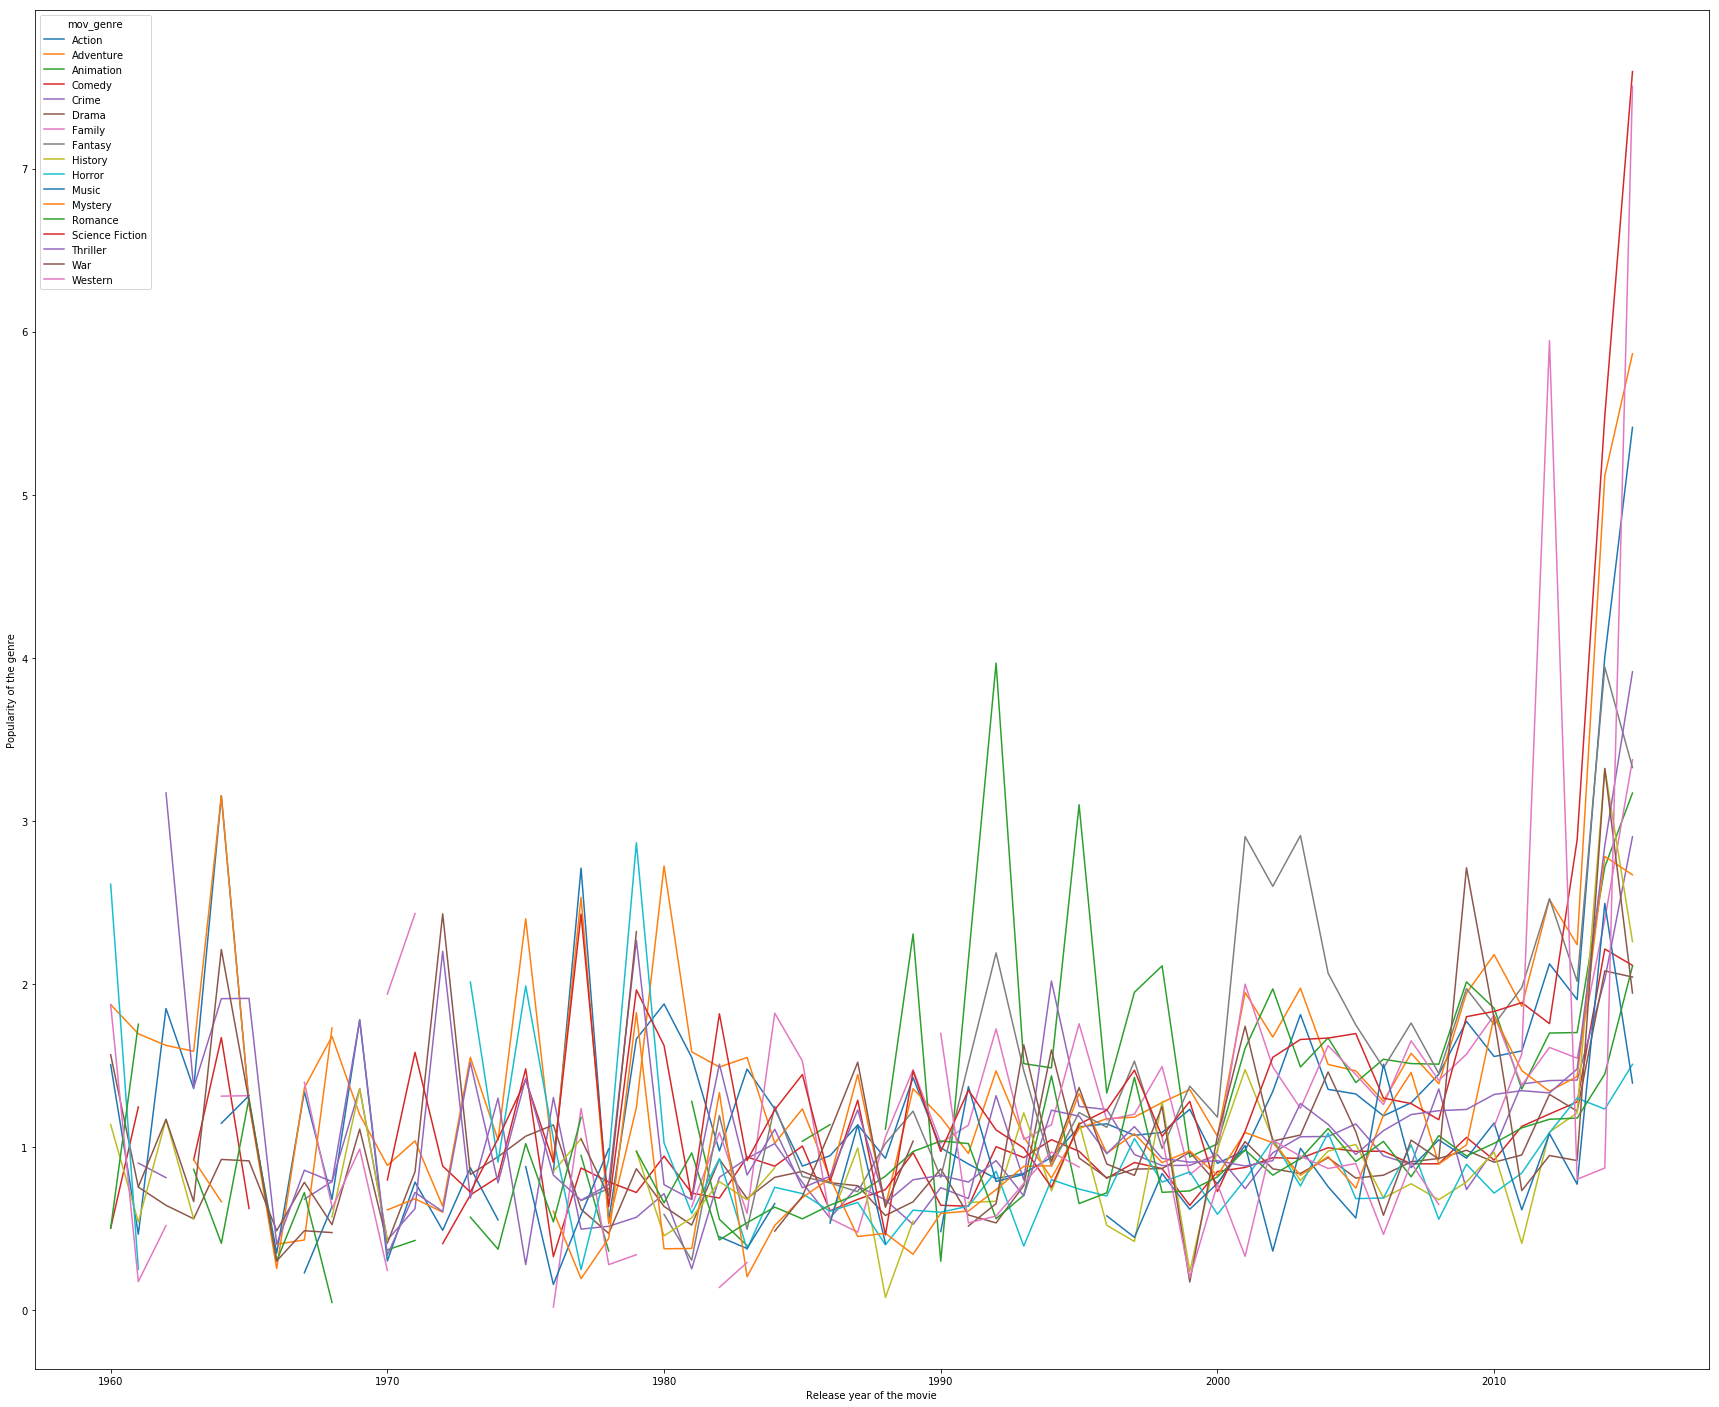

In [90]:
genre1.plot(figsize=(30,25));
plt.xlabel("Release year of the movie")
plt.ylabel("Popularity of the genre")

FROM the plot below, looks like the Action, Adventure or Science fiction genre are the most popular. Let us also verify this by looking at the summary statistics of the genre1 subset data.


In [45]:
#Look at the genre summary to see the min and max values of rating for each 
genre1.describe()

mov_genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,55.000000,56.000000,39.000000,51.000000,52.000000,14.000000,56.000000,47.000000,42.000000,8.000000,46.000000,47.000000,41.000000,49.000000,52.000000,48.000000,1.000000,55.000000,45.000000,35.000000
mean,1.363694,1.596937,1.680659,0.932889,0.987369,0.318959,0.915193,1.342790,1.556537,0.185525,0.872031,0.926438,0.823905,0.945080,0.859989,1.509863,0.273628,1.208024,1.113672,1.086856
std,0.856074,0.940943,0.786319,0.345575,0.486417,0.168523,0.386094,0.608368,0.831474,0.098422,0.533633,0.525575,0.422961,0.547869,0.374887,1.189512,NaN,0.673522,0.632326,1.478464
min,0.300380,0.253584,0.298196,0.326138,0.251658,0.021371,0.409650,0.017498,0.241283,0.077948,0.076438,0.247531,0.155768,0.191541,0.045242,0.207257,0.273628,0.336237,0.170818,0.138162
25%,0.896499,1.101250,1.207475,0.718161,0.684707,0.254937,0.735464,1.053177,0.908778,0.119765,0.549442,0.647691,0.563893,0.599109,0.614691,0.957540,0.273628,0.792489,0.696623,0.489831
50%,1.230245,1.415209,1.537277,0.903773,0.888915,0.314185,0.856353,1.377305,1.458269,0.136056,0.785423,0.798866,0.787386,0.880388,0.823270,1.282361,0.273628,0.958368,1.034829,0.775805
75%,1.551043,1.735398,2.060657,0.985333,1.233440,0.446741,0.942150,1.615202,2.008022,0.275037,1.048822,1.046064,1.008108,1.194338,1.033914,1.660618,0.273628,1.337544,1.282053,0.977835
max,5.412644,5.864179,3.966538,2.213240,2.901992,0.576401,2.428841,3.373933,3.941149,0.336871,3.321015,2.865282,2.493149,2.781021,2.108030,7.594638,0.273628,3.913396,3.319962,7.504550


So, looking at the above stats, we check at the last row that is the maximum values of popularity rating for each genre column. And we see that the Science Fiction has the highest popularity rating of 7.59. Action, Adventure have 5.41 and 5.86 as the ratings respectively. Also we want to check the counts of each so that this comparison makes sense. So looking at the counts of these three genres, action and adventure are 55 and 56 respectively and science fiction is 48, so its a fair comparison. Let us subset the data to only include the top 5 or 6 genres and then compare at their popularity to get a better idea.

Below, the columns for the genres Foreign, Docuemtary and TV Movie are being dropped as discussed above based on their counts and low popularity as seen in the numbers.

In [46]:
#Drop the less available genres
genre1= genre1.drop(['Foreign', 'Documentary', 'TV Movie'], axis = 1)

Text(0,0.5,'Popularity of the genre')

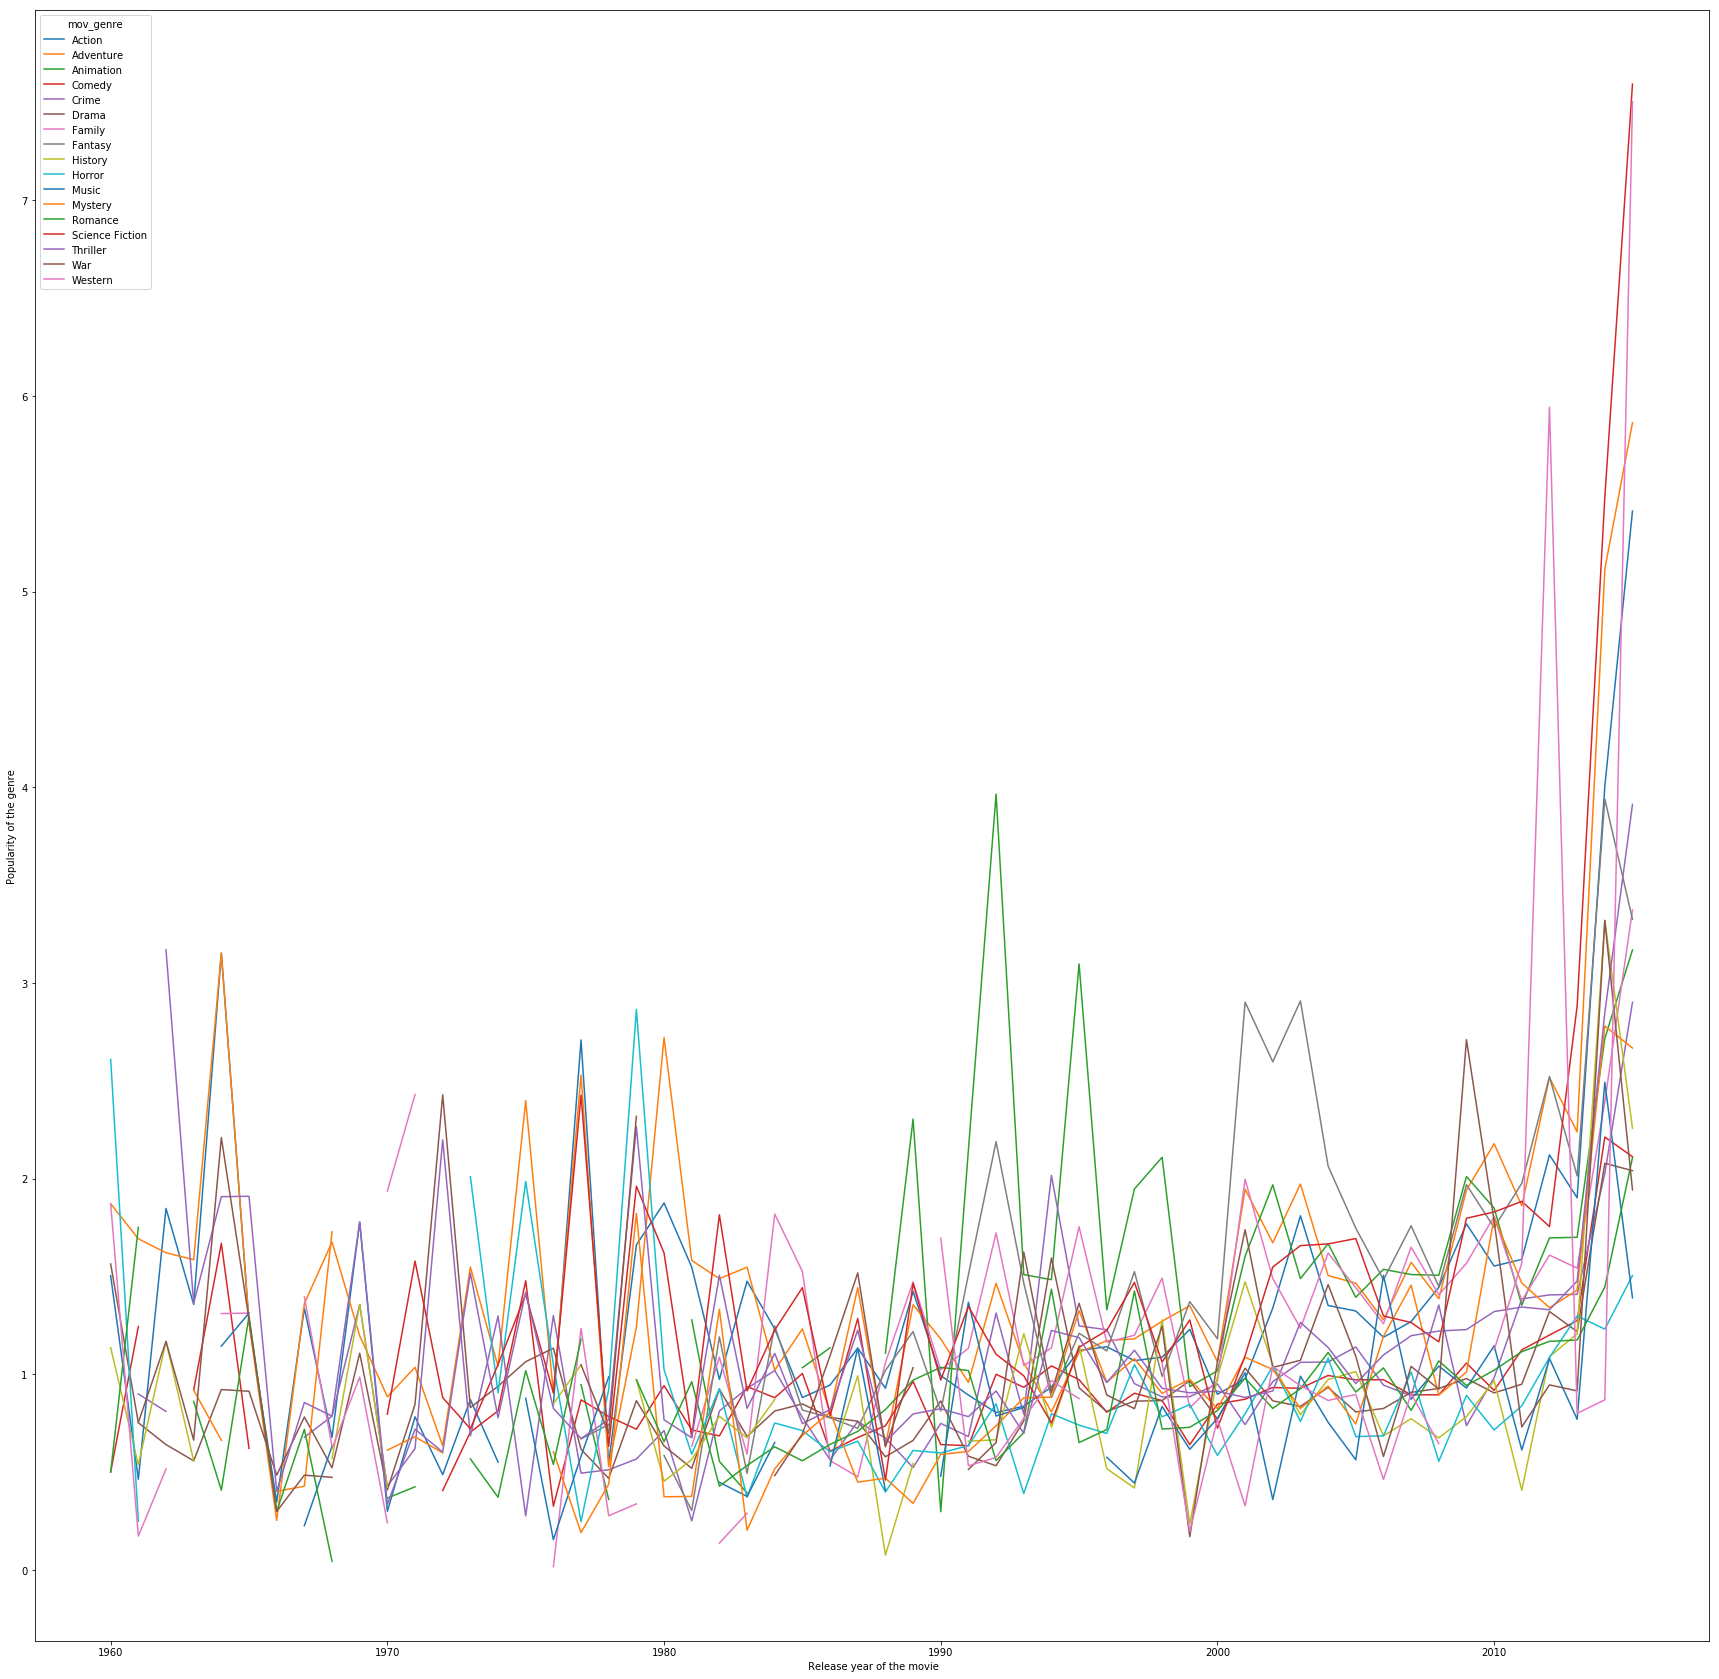

In [91]:
#PLOT one more time to get a better look
genre1.plot(figsize=(30,30));
plt.xlabel(" Release year of the movie")
plt.ylabel("Popularity of the genre")

Adding a research question as a supplement to the question 6 above: Do popular genres generate more revenue than non popular ones?


In [48]:
#Subset the data containing popular genres and non popular genres based on the above findings for the same.
popu_genres =movie_edited.query("mov_genre==['Action', 'Adventure','Science Fiction','Western']")
nopop_genres= movie_edited.query("mov_genre!=['Action', 'Adventure','Science Fiction','Western']")

In [49]:
diff = popu_genres.revenue_adj.mean() - nopop_genres.revenue_adj.mean()

In [50]:
print('Average revenue difference = ', diff)

Average revenue difference =  88026669.742471


So, we see that the popular genres do generate more revenue overall than the non popular ones, over millions.

From the plot and the summary stats we can conclude that that the most popular genres are Science Fiction, Action, Adventure, Animation and Western.

## Research question 7: Does popularity dictate more profits?

At this point, look at the over all scatter plot of the movie data

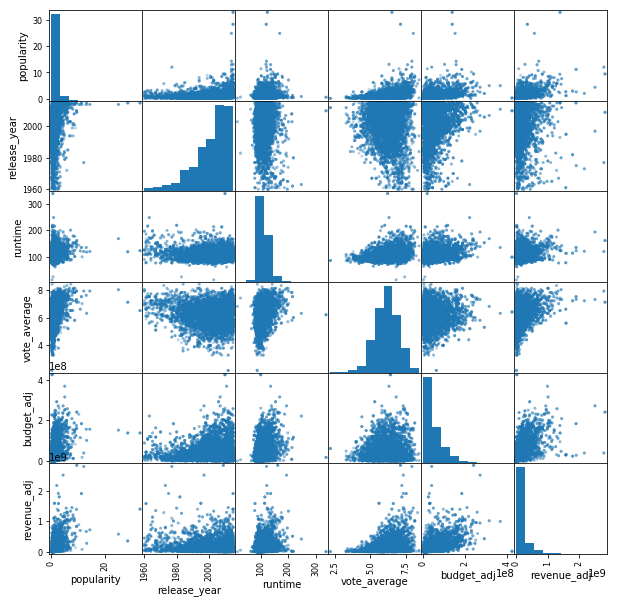

In [51]:
pd.plotting.scatter_matrix(movie_edited, figsize =(10,10), alpha = 0.3);

From the above scatter matrix, it looks like the popularity is positively related with the variables revenue, budget and vote average. Let us also look at the correlation coefficients of these variables.

In [52]:
#Find the pearson correlation for the subset data movie_edited
movie_edited.corr(method='pearson')

,popularity,release_year,runtime,vote_average,budget_adj,revenue_adj
popularity,1.000000,0.192266,0.208215,0.326398,0.390067,0.544425
release_year,0.192266,1.000000,-0.118026,-0.127391,0.112186,-0.078609
runtime,0.208215,-0.118026,1.000000,0.344050,0.322322,0.276884
vote_average,0.326398,-0.127391,0.344050,1.000000,0.051923,0.285231
budget_adj,0.390067,0.112186,0.322322,0.051923,1.000000,0.559456
revenue_adj,0.544425,-0.078609,0.276884,0.285231,0.559456,1.000000


The table above shows that popularity is strongly and positively correlated with the adjusted revenue(as of 2010) with the r coeffiecint being 0.54. Budget and vote average also are moderately positively related with popularity. The budget also is strongly correalted with the revenue with r = 0.55.

Now let us see the visual plot of popularity and revenue.

Text(0,0.5,'Popularity')

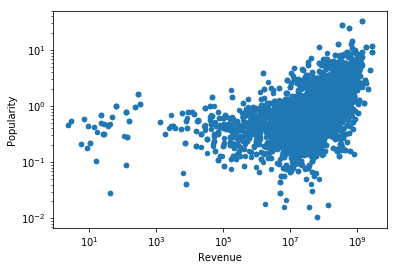

In [53]:
movie_edited.plot(y='popularity', x='revenue_adj' , kind = 'scatter', loglog=True)
plt.xlabel("Revenue")
plt.ylabel("Popularity")

The plot above verifies the positive correlation between popularity and the revenue generated.

Also look at the budget and the revenue plot individually.

Text(0,0.5,'Revenue')

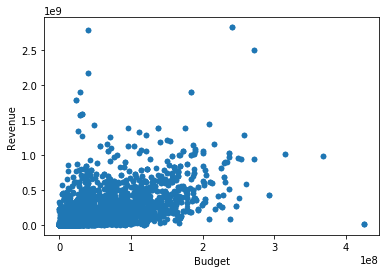

In [54]:
movie_edited.plot(y='revenue_adj', x='budget_adj' , kind = 'scatter');
plt.xlabel("Budget")
plt.ylabel("Revenue")

The plot above does verify the positive correlation between the variable budget and revenue.

## Research question 8: Which horror movie is the most popular?

In [55]:
#Subset the movie data for horror movies
horr_movie= movie_edited[movie_edited['mov_genre']== 'Horror']

In [56]:
# Find the average popularity for a horror movie
horr_movie.groupby(['release_year', 'original_title']).popularity.max().head()

release_year  original_title          
1960          Psycho                      2.610362
1961          The Pit and the Pendulum    0.249542
1963          The Birds                   1.139321
1968          Rosemary's Baby             0.724527
1973          The Exorcist                2.010733
Name: popularity, dtype: float64

Text(0,0.5,'Popularity rating')

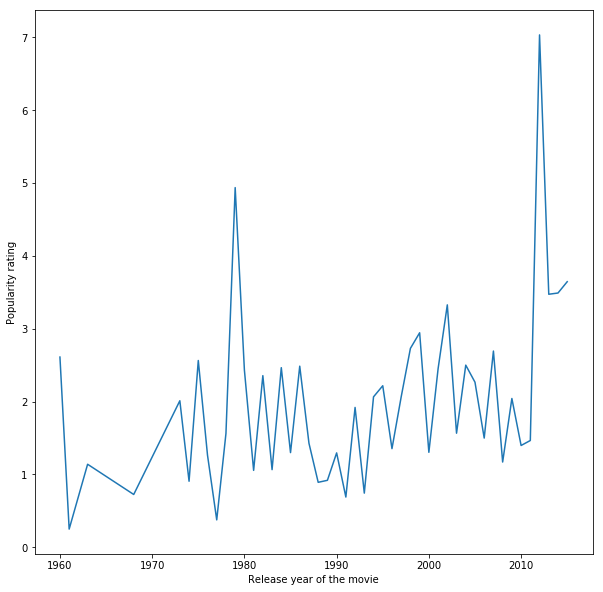

In [57]:
#Visualize the popularity for horror movies
horr_movie.groupby('release_year').popularity.max().plot(figsize=(10,10))
plt.xlabel("Release year of the movie")
plt.ylabel("Popularity rating")

In [58]:
#Let us find out which movie show those spikes for the maximum popularity rating in 1980 annd after 2010
horror_1980= horr_movie.query('release_year >=1979 & release_year <1981')
horror_2010= horr_movie.query('release_year>2009 & release_year <=2015')

In [59]:
horror_1980.popularity.max()

4.935897

In [60]:
horror_1980.query('popularity ==4.9358969999999998')

,mov_genre,popularity,release_year,original_title,runtime,vote_average,budget_adj,revenue_adj
7825,Horror,4.935897,1979,Alien,117,7.6,3.305009e+07,3.152733e+08


In [61]:
horror_2010.popularity.max()

7.031452000000001

In [62]:
horror_2010.query('popularity==7.0314520000000007')

,mov_genre,popularity,release_year,original_title,runtime,vote_average,budget_adj,revenue_adj
4362,Horror,7.031452,2012,Underworld: Awakening,88,6.0,6.648210e+07,1.257461e+08


Above we find that the movie 'Alien' was most popular in 1979 and the Underworld series horror called 'Awakening' in the year 2012 with popularity 0f 7.03.

## Conclusions
### Results: Our data suggests that

1.The average run time for a movie is 109 minutes.
2.The run time for a movie has been decreasing over the years from 1960 to 2015.
3.The budget ranges from 2.370705e+00 to 2.827124e+09;from 2 million to billions of dollars.The data for budget and revenue with zero values were removed to get be able to better analyse the data. 
4.The popularity also showed a varied range of values but looking closely at the data for these values indicated that these values seem to be valid and did not look as isolated. So there was no need to discard these data.
5.The average vote for movies was found to be 6.17 with a normal distribution.

6.It was seen that the genre drama was highest in count followed by the genre thriller and then Comedy. 
7.The most popular genres over the years from 1960 to 2015 were found to be Science Fiction, Action, Adventure, Animation and Western. Additionally,we also saw that the popular movie genres seem to generate more profit than the other genres.

8.Popularity and revenue are found to be positively correlated. The pearson correlation coefficient being 0.54. That is, it indicates that the revenue of a movie  may increase with its popularity.
9.The revenue also showed a strong positive relationship with the budget. 
10.The two most popular horror moviesfound are the 'Alien' made in 1979 and the other called 'Underworld :Awakening' in 2012.

### Limitations: There are a few limitations to our movie data:
     
1.We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime and genre. 
2.Our analysis is limited to only provided dataset. For example, some movie have no genres and directors specified so we have missing data.
3.There is no normalization or exchanges rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.
4.There is no data about the international movies based on language and/or country. So this could be a considered as a generic analyses and cannot be narrowed down to a specific country.
5.Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards relationship being analyzed. 

In [101]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0